# Exercise sheet 2

## Exercise 1
> a) You will notice that this format is not particularly suited for data analysis. Bring the data into a better format, transform and reshape the data.

### Approach:
> 
> First of all i import the necessary packages



In [92]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ipywidgets as widgets
import plotly.express as px
import missingno as msno
from sklearn.cluster import DBSCAN


Next I am  loading the json file into a dictionary and then transform the dictionary into a dataframe.

In [63]:
#load the jsonfile into a dictionary
with open("spotify_modified.json", "r") as json_file:

       json_data = json.load(json_file)

In [64]:
#transform the dictionary into a dataframe
spotify_df = pd.DataFrame(json_data)

In [65]:
#Have a look at the dataframe
spotify_df


,track_name,artist(s)_name,artist_count,release_date,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,ranking
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,07/14/23,553,147,141381703,43,263,45,10,826,125,B,Major,"{'danceability_%': 80, 'valence_%': 89, 'energ..."
1,LALA,Myke Towers,1,03/23/23,1474,48,133716286,48,126,58,14,382,92,C#,Major,"{'danceability_%': 71, 'valence_%': 61, 'energ..."
2,vampire,Olivia Rodrigo,1,06/30/23,1397,113,140003974,94,207,91,14,949,138,F,Major,"{'danceability_%': 51, 'valence_%': 32, 'energ..."
3,Cruel Summer,Taylor Swift,1,08/23/19,7858,100,800840817,116,207,125,12,548,170,A,Major,"{'danceability_%': 55, 'valence_%': 58, 'energ..."
4,WHERE SHE GOES,Bad Bunny,1,05/18/23,3133,50,303236322,84,133,87,15,425,144,A,Major,"{'danceability_%': 65, 'valence_%': 23, 'energ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,Sweet Nothing,Taylor Swift,1,10/21/22,1747,0,186104310,9,6,13,0,2,177,,Major,"{'danceability_%': 34, 'valence_%': 39, 'energ..."
954,Cruel Summer,Taylor Swift,1,08/23/19,7858,100,800840817,116,207,125,12,548,170,A,Major,"{'danceability_%': 55, 'valence_%': 58, 'energ..."
955,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,07/13/23,437,31,11599388,17,29,26,3,208,97,,Major,"{'danceability_%': 79, 'valence_%': 92, 'energ..."
956,Titi Me Pregunt,Bad Bunny,1,05/06/22,9037,42,1264310836,124,133,139,14,166,107,F,Minor,"{'danceability_%': 65, 'valence_%': 19, 'energ..."


Looking at the created dataframe I created one column ranking with a dictionary.
No I would like to make a single column for each measure in the dictionary. 

In [66]:
#Create columns: "danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%","liveness_%", speechiness_%"
#I am using the apply function to create a new column for each measure in the dictionary and drop the old column
spotify_df = pd.concat([spotify_df.drop(['ranking'], axis=1), spotify_df['ranking'].apply(pd.Series)], axis=1)
#I have a look at the columns
spotify_df.columns


Index(['track_name', 'artist(s)_name', 'artist_count', 'release_date',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

After having a look at the columns adding the new columns worked out. I added the columns: 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%' and 'speechiness_%'.

In [67]:
spotify_df

,track_name,artist(s)_name,artist_count,release_date,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,07/14/23,553,147,141381703,43,263,45,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,03/23/23,1474,48,133716286,48,126,58,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,06/30/23,1397,113,140003974,94,207,91,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,08/23/19,7858,100,800840817,116,207,125,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,05/18/23,3133,50,303236322,84,133,87,...,144,A,Major,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,Sweet Nothing,Taylor Swift,1,10/21/22,1747,0,186104310,9,6,13,...,177,,Major,34,39,16,97,0,12,5
954,Cruel Summer,Taylor Swift,1,08/23/19,7858,100,800840817,116,207,125,...,170,A,Major,55,58,72,11,0,11,15
955,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,07/13/23,437,31,11599388,17,29,26,...,97,,Major,79,92,89,5,0,6,5
956,Titi Me Pregunt,Bad Bunny,1,05/06/22,9037,42,1264310836,124,133,139,...,107,F,Minor,65,19,72,10,0,13,25


###  Exercis 1
> b) Are there outliers in the danceability (danceability_%)?
> • Please use several outlier detection methods to justify your answer. 
> • How do the outlier-detection algorithms and their results differ??
#### Approach:
> First of all I have a look at the danceability_% column and its values, using the describe function.

In [68]:
#Get information about the danceability_% column
spotify_df["danceability_%"].describe()


count    958.000000
mean      66.862213
std       16.034765
min      -60.000000
25%       57.000000
50%       69.000000
75%       78.000000
max      199.000000
Name: danceability_%, dtype: float64

The results indicate that there are outliers since the minimum and maximum value of danceability are to low/high.
Next I will visualize the data, using a boxplot to see if I can detect any outliers, using the interquartile range.

In [69]:
# Create a box plot using Plotly Express
fig = px.box(spotify_df, y='danceability_%', title='Boxplot of danceability')

# Update the layout
fig.update_layout(yaxis_title='danceability')

# Show the plot
fig.show()


Looking at the boxplot I can detect outliers above the upper fence and below the lower fence.

#### Z-Score Method:
> This method measures the number of standard deviations a data point is from the mean. Data points with high z-scores (usually greater than 3 or less than -3) are considered outliers. So now I will look at the 10 highest absolute z-scores of danceability_%.

In [70]:
def top_abs_z_scores(data_frame, column_name, top_n=10):
    # Calculate Z-scores for the specified column
    z_scores = stats.zscore(data_frame[column_name])

    # Get the absolute values of Z-scores
    abs_z_scores = abs(z_scores)

    # Create a DataFrame to store the absolute Z-scores and their corresponding indices
    z_scores_df = pd.DataFrame({
        'Z-Score': abs_z_scores,
        'Index': data_frame.index
    })

    # Sort the DataFrame by absolute Z-Score in descending order and get the top N rows
    top_z_scores = z_scores_df.sort_values(by='Z-Score', ascending=False).head(top_n)

    return top_z_scores

# Example usage
# Assuming you have a DataFrame named 'spotify_df'
top_z_scores = top_abs_z_scores(spotify_df, "danceability_%", top_n=10)
print("Top 10 absolute Z-scores for 'danceability':")
print(top_z_scores)

Top 10 absolute Z-scores for 'danceability':
      Z-Score  Index
224  8.245010    224
666  7.915830    666
92   4.920771     92
469  2.736873    469
46   2.691671     46
447  2.674476    447
387  2.612079    387
521  2.487285    521
523  2.424888    523
704  2.424888    704


Looking at the results 3 of the z values have a value far above 3, which makes them clearly detectable as outliers.
Next 

In [71]:
indices_to_select = [224, 666, 92,  469]
selected_values = spotify_df.loc[indices_to_select, "danceability_%"]
selected_values

224    199
666    -60
92     -12
469     23
Name: danceability_%, dtype: int64

Looking at the Z values 4 values actually have an absolute value above 3 which makes them outliers from that standpoint, whereas in the visualization with the boxplot there were in total 5 outliers. 

In [72]:
#look at rows where at least one column has a missing value 
spotify_df[spotify_df.isna().any(axis=1)]


,track_name,artist(s)_name,artist_count,release_date,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


Outlier Detection wiht Mean Absolute Deviation (MAD)


In [82]:
# Calculate the median of the dataset
median = np.median(spotify_df["danceability_%"])

# Calculate the absolute deviations from the median
absolute_deviations = np.abs(spotify_df["danceability_%"] - median)

# Calculate the MAD (Median Absolute Deviation)
mad = np.median(absolute_deviations)

# Set a threshold for outliers
threshold = 5 * mad

# Detect outliers
outliers = [x for x in spotify_df["danceability_%"] if np.abs(x - median) > threshold]


print("Median:", median)
print("MAD:", mad)
print("Outliers:", outliers)

Median: 69.0
MAD: 10.0
Outliers: [-12, 199, -60]


According to the MAD method I get way more outliers than with the Z-score and the boxplot method. In my eyes I get too many outliers for this case with the MAD method or at least I would have to increase the threshold by increasing the factor of mad.

## Exercise 1
>c) There are some other anomalies in the dataset. Find them, document your findings, handle them appropriately and describe which method you applied.
>d) Handle missing data appropriately. Which method did you choose and why?

### Approach
> First of all I check the whole dataset for missing values using the missingno package for visualization.

<Axes: >

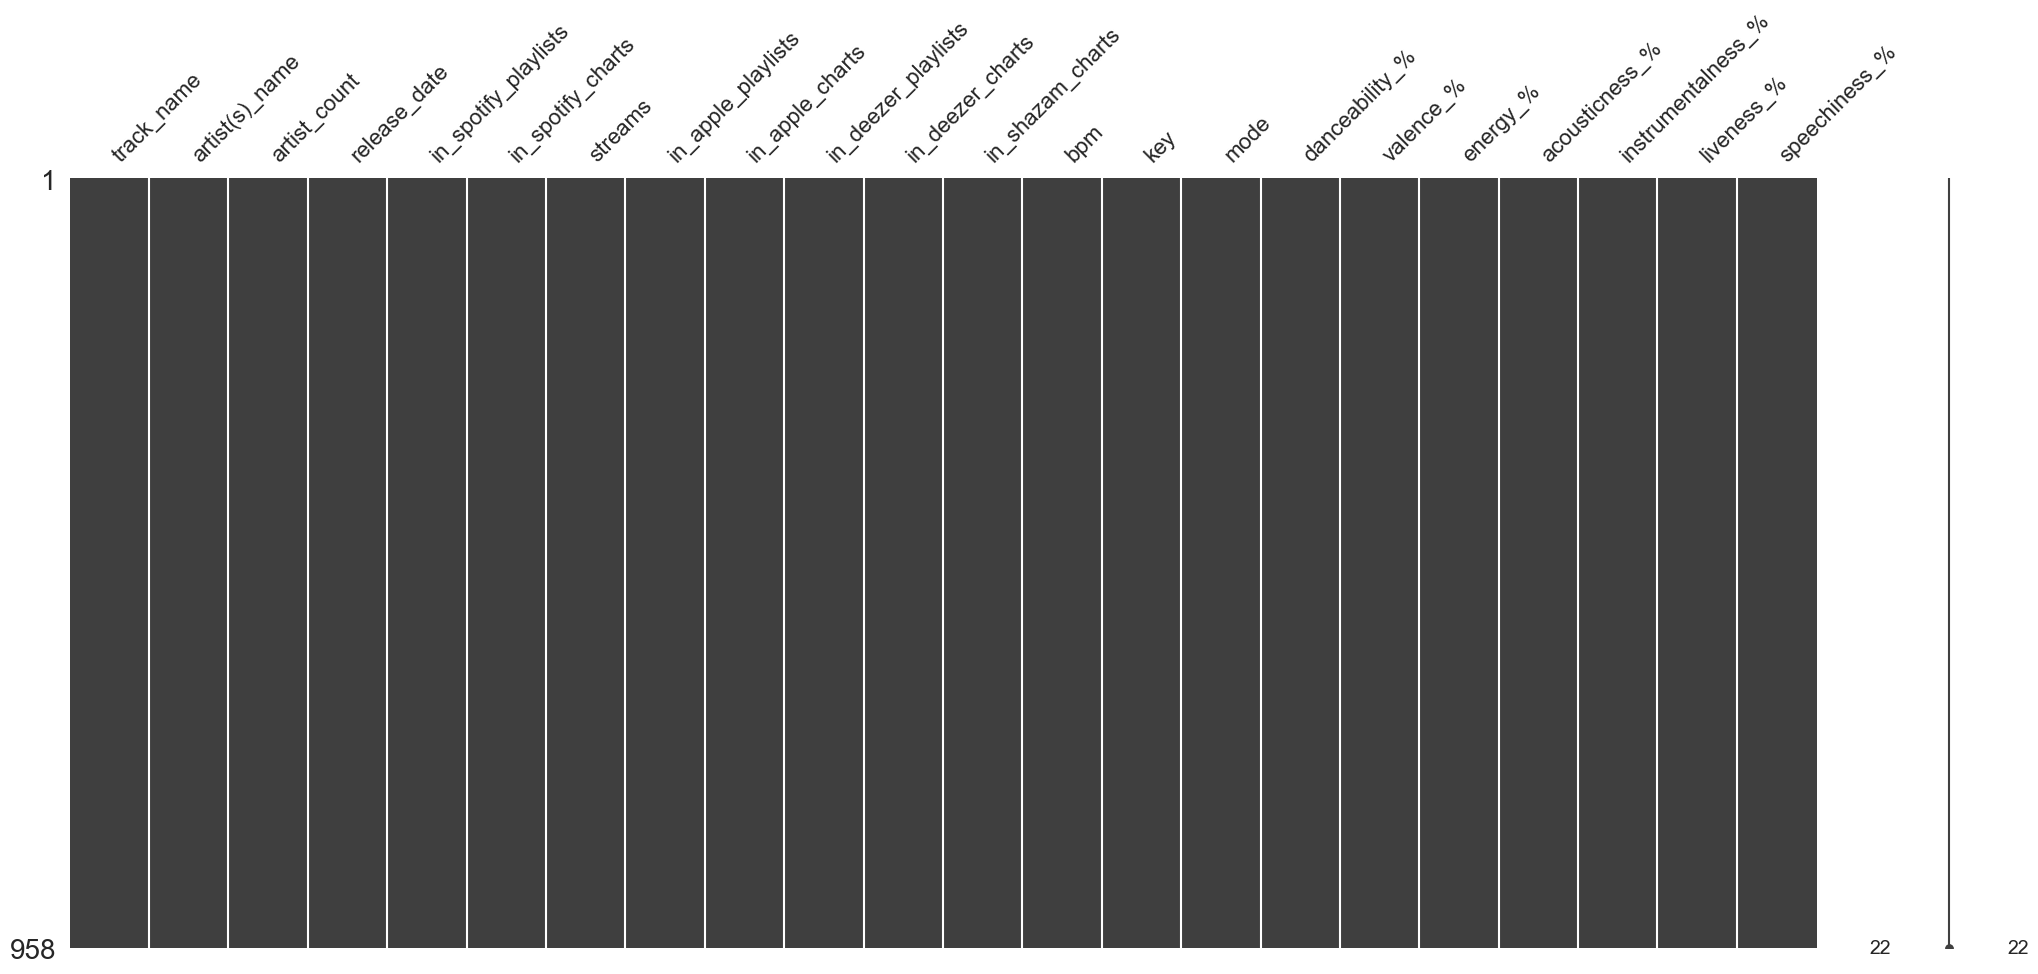

In [107]:
msno.matrix(spotify_df)

### Interpretation
> Looking at the visualization I cannot detect any missing values in the dataset. Maybe they are not market to be detected.So now I will check if there are columns with no values at all.

In [109]:
#Detect rows where at least one column has no value at all as a value
spotify_df[spotify_df.isin([""]).any(axis=1)]


,track_name,artist(s)_name,artist_count,release_date,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,01/12/23,,115,1316855716,300,215,745,...,118,,Major,71,65,68,6,0,3,7
14,As It Was,Harry Styles,1,03/31/22,23575,130,2513188493,403,198,863,...,174,F#,Major,52,66,73,34,0,31,6
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,07/13/23,873,104,30546883,80,227,95,...,78,,Major,44,14,9,96,0,10,3
22,I Wanna Be Yours,Arctic Monkeys,1,01/01/13,12859,110,1297026226,24,98,582,...,135,,Major,48,44,42,12,2,11,3
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,06/01/23,1150,31,123122413,22,33,34,...,120,,Major,81,63,68,11,0,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,I Really Want to Stay at Your House,"Rosa Walton, Hallie Coggins",2,12/18/20,668,1,140430339,0,0,31,...,125,D#,Minor,49,13,74,0,0,9,4
938,Labyrinth,Taylor Swift,1,10/21/22,1597,0,187339835,6,3,15,...,110,,Major,48,15,31,80,22,12,4
940,Sweet Nothing,Taylor Swift,1,10/21/22,1747,0,186104310,9,6,13,...,177,,Major,34,39,16,97,0,12,5
953,Sweet Nothing,Taylor Swift,1,10/21/22,1747,0,186104310,9,6,13,...,177,,Major,34,39,16,97,0,12,5


### Result
> 152 rows have missing values which I will now turn into Nan values to be detected. This next operation is used to replace all empty or whitespace-only strings in the DataFrame with "NaN".

In [112]:
#turn all the missing values into Nan values 
spotify_df = spotify_df.replace(r'^\s*$', np.nan, regex=True)

I will make another visualization of the missing values now.

<Axes: >

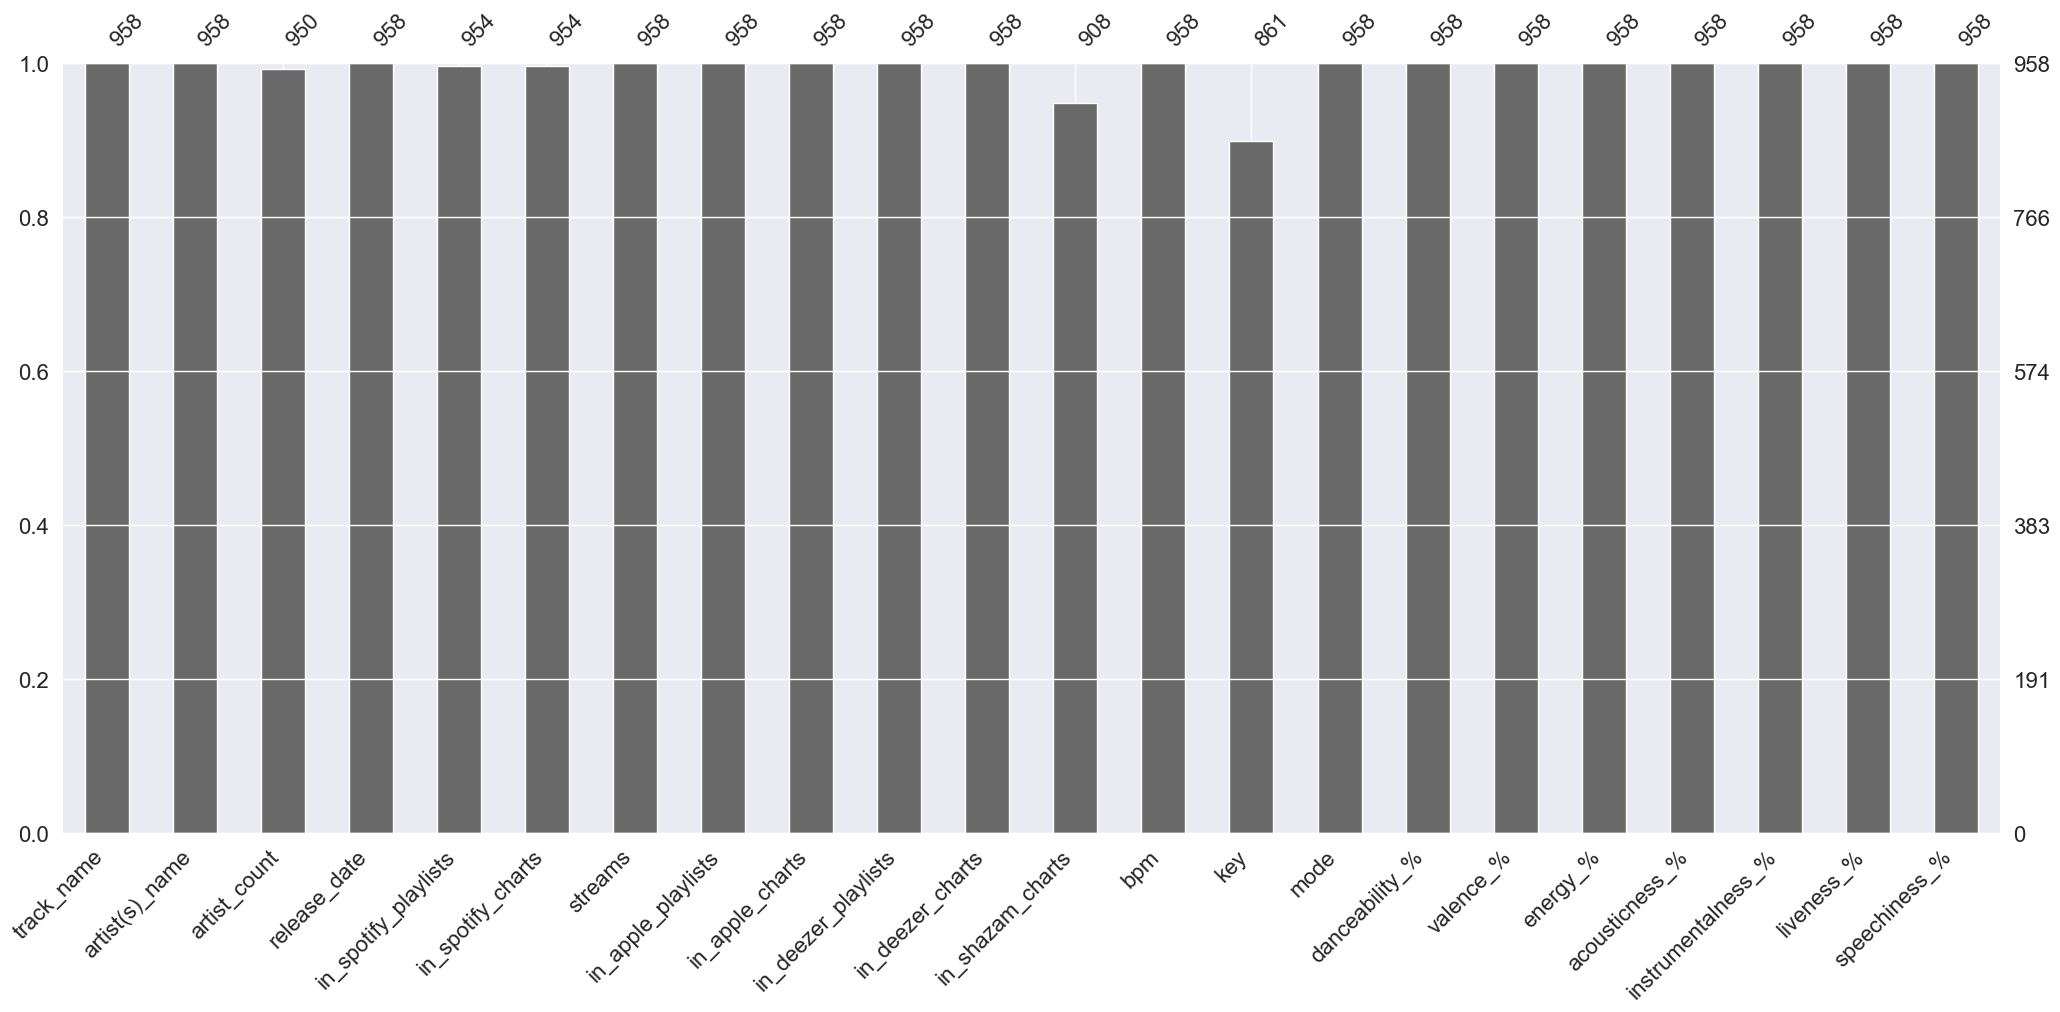

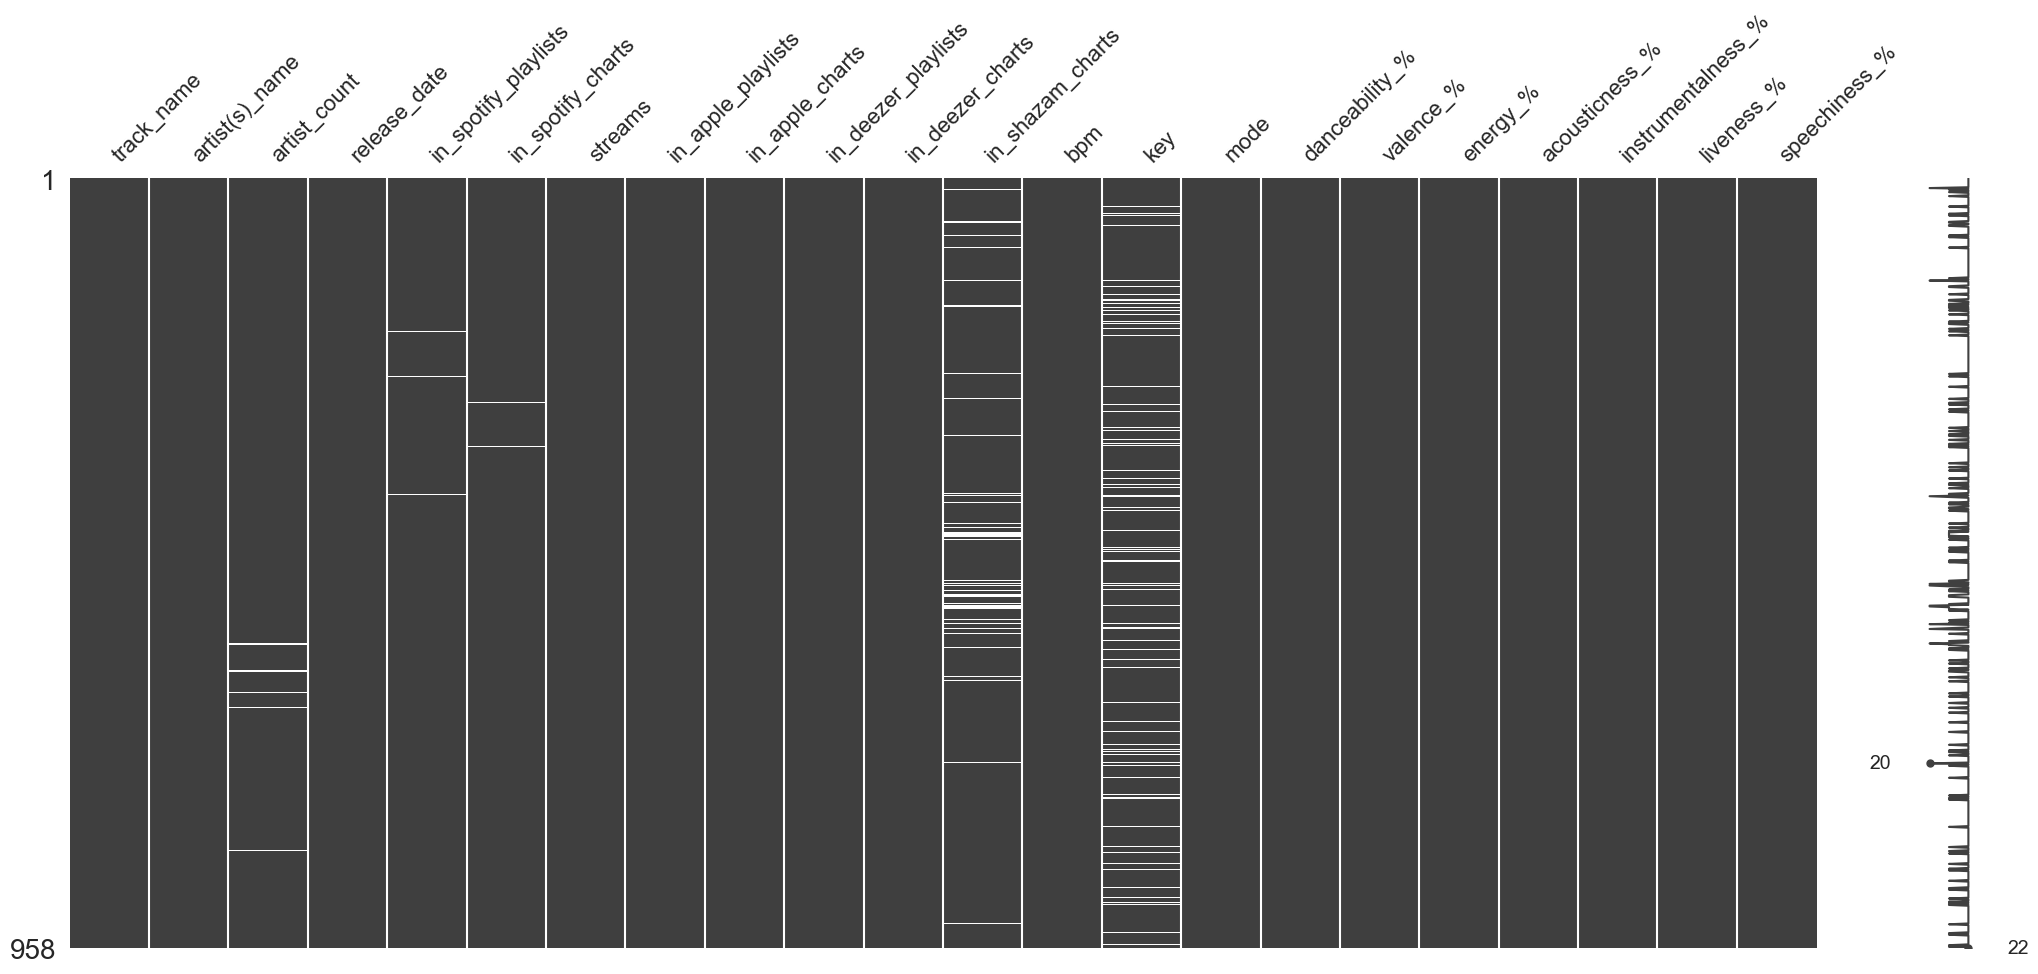

In [116]:
#visualize missing values
msno.bar(spotify_df)
msno.matrix(spotify_df)

Looking at the visualization now I can detect all the missing values and I can see that most of the missing values are in the feature "key", which I dont want to drop though so instead I will drop all the rows with missing values and then visualize again to check if it worked.


In [117]:
#drop all rows with missing values
spotify_df = spotify_df.dropna()

<Axes: >

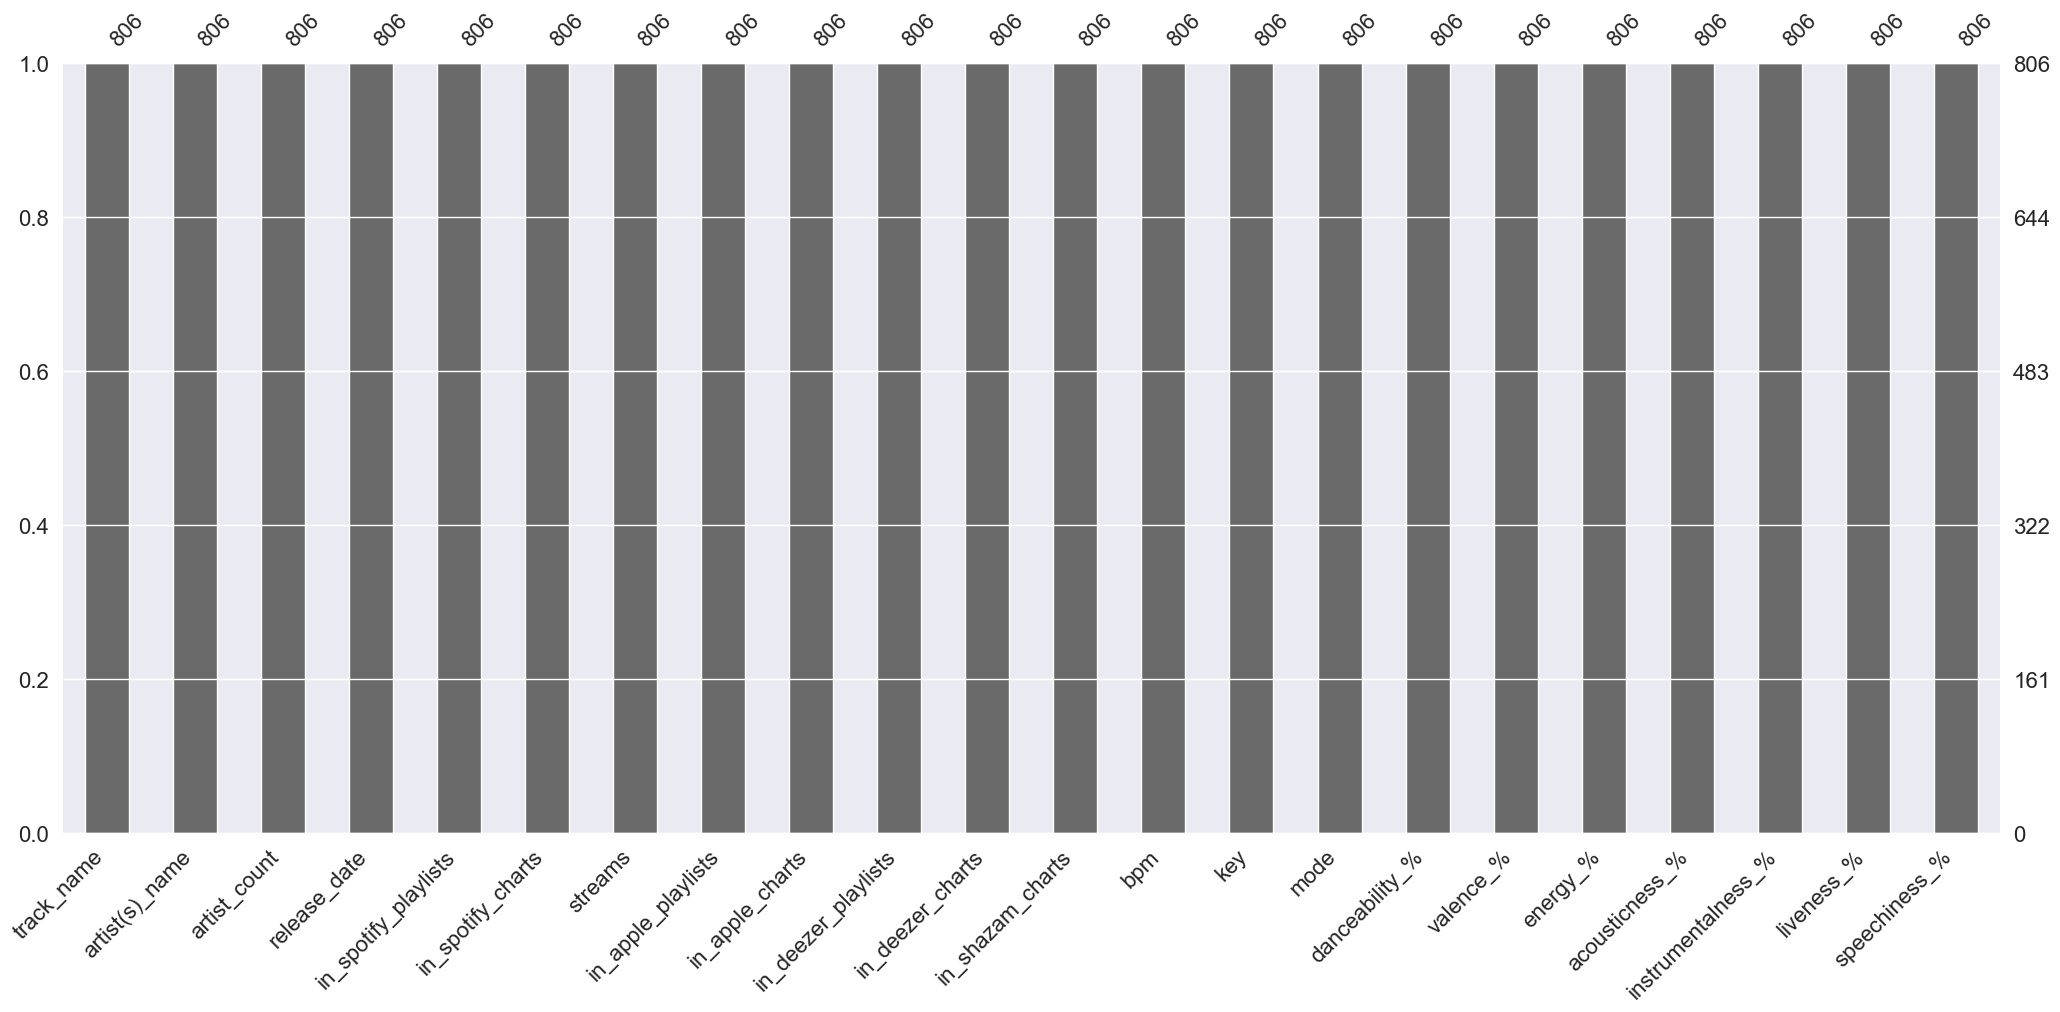

In [118]:
#visualize missing values
msno.bar(spotify_df)

It worked out but now I shrinked my dataset from 958 to 806, which is still a feasible amount of data. Next I will look for duplicates in the dataset.

In [121]:
#check for duplicates
spotify_df.duplicated().sum()

2

I discovered that there are 2 duplicates which I will drop now.

In [122]:
#drop duplicates
spotify_df = spotify_df.drop_duplicates()

No I will check if the datatypes within the columns are varying


In [126]:
#check datatypes
for column in spotify_df.columns:
    print(f"Datatype of {column} is {spotify_df[column].dtype}")

Datatype of track_name is object
Datatype of artist(s)_name is object
Datatype of artist_count is float64
Datatype of release_date is object
Datatype of in_spotify_playlists is float64
Datatype of in_spotify_charts is float64
Datatype of streams is object
Datatype of in_apple_playlists is int64
Datatype of in_apple_charts is int64
Datatype of in_deezer_playlists is int64
Datatype of in_deezer_charts is int64
Datatype of in_shazam_charts is float64
Datatype of bpm is int64
Datatype of key is object
Datatype of mode is object
Datatype of danceability_% is int64
Datatype of valence_% is int64
Datatype of energy_% is int64
Datatype of acousticness_% is int64
Datatype of instrumentalness_% is int64
Datatype of liveness_% is int64
Datatype of speechiness_% is int64


Turns out all the columns datatypes are consistent. Next I will have a look if there are any more anomalies in the dataset.

In [128]:
spotify_df.describe()

,artist_count,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,1.573383,4825.778607,11.839552,60.000000,49.680348,365.476368,2.445274,58.248756,126.334577,67.273632,51.093284,64.246269,26.228856,1.625622,18.238806,10.590796
std,0.923385,7712.548045,18.729519,74.744979,49.649793,1150.649201,5.389279,154.629088,62.873343,16.243777,23.479198,16.098051,25.462494,8.566371,13.589799,10.235847
min,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,-60.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,831.250000,0.000000,12.000000,6.000000,12.750000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2037.500000,3.000000,32.000000,35.000000,39.000000,0.000000,3.000000,120.000000,70.000000,51.000000,65.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,4878.750000,16.000000,78.250000,84.000000,141.250000,2.000000,40.000000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,10.000000,52898.000000,147.000000,532.000000,275.000000,12367.000000,45.000000,1451.000000,999.000000,199.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [132]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, 0 to 957
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            804 non-null    object 
 1   artist(s)_name        804 non-null    object 
 2   artist_count          804 non-null    float64
 3   release_date          804 non-null    object 
 4   in_spotify_playlists  804 non-null    float64
 5   in_spotify_charts     804 non-null    float64
 6   streams               804 non-null    object 
 7   in_apple_playlists    804 non-null    int64  
 8   in_apple_charts       804 non-null    int64  
 9   in_deezer_playlists   804 non-null    int64  
 10  in_deezer_charts      804 non-null    int64  
 11  in_shazam_charts      804 non-null    float64
 12  bpm                   804 non-null    int64  
 13  key                   804 non-null    object 
 14  mode                  804 non-null    object 
 15  danceability_%        804 no

In [136]:
# Write a function to check for class imbalance
def check_class_imbalance(data_frame, target_column):
    # Get the counts for each class
    class_counts = data_frame[target_column].value_counts()

    # Get the class names
    class_names = class_counts.index

    # Get the class counts
    class_values = class_counts.values

    # Create a bar plot
    fig = px.bar(
        x=class_names,
        y=class_values,
        title=f"Class imbalance for '{target_column}'"
    )
    fig.update_xaxes(title_text=target_column)  # Update x-axis title
    fig.update_yaxes(title_text="Count")  # Update y-axis title
    # Show the plot
    fig.show()

list = ["key", "mode", "danceability_%", "artist(s)_name" ]
for column in list:
    check_class_imbalance(spotify_df, column)


In [137]:
#count of all songs of Taylor Swift
spotify_df[spotify_df["artist(s)_name"] == "Taylor Swift"].count()

track_name              29
artist(s)_name          29
artist_count            29
release_date            29
in_spotify_playlists    29
in_spotify_charts       29
streams                 29
in_apple_playlists      29
in_apple_charts         29
in_deezer_playlists     29
in_deezer_charts        29
in_shazam_charts        29
bpm                     29
key                     29
mode                    29
danceability_%          29
valence_%               29
energy_%                29
acousticness_%          29
instrumentalness_%      29
liveness_%              29
speechiness_%           29
dtype: int64

Looking at the count of classes in mode, there is a big difference in class count where 519 of the songs are major and only 285 are minor. 
Possible consequences: Bias in Model Performance, Overfitting, Poor Generalization


## Exercise 2
